In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import requests

# === Exemple de base ===
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    'target': [2, 4, 6, 8, 10]
}
df = pd.DataFrame(data)

# Séparation features / target
X = df[['feature1', 'feature2']]
y = df['target']

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Score
print('Score du modèle (R²) :', model.score(X_test_scaled, y_test))

# === Ton code ci-dessous ===


Score du modèle (R²) : nan


C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [30]:
df = pd.read_csv(r"D:\Documents\VSCODE\LWG\Projet Santé mentale\anxiety_depression_usa.csv")
df

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,Female,Other,Student,5.1,0.1,7,16,15,5,...,0,Occasional,0,0,NaN,2,8,7,6,5
1196,43,Female,Master's,Employed,8.9,0.4,9,19,4,9,...,0,NaN,0,1,NaN,8,9,7,6,4
1197,71,Female,PhD,Retired,6.0,0.1,2,15,4,2,...,0,NaN,0,1,NaN,2,9,9,3,7
1198,21,Male,Other,Employed,8.5,2.7,8,12,20,2,...,1,NaN,0,0,NaN,8,5,1,3,7


In [13]:
df.columns

Index(['Age', 'Gender', 'Education_Level', 'Employment_Status', 'Sleep_Hours',
       'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score',
       'Depression_Score', 'Stress_Level', 'Family_History_Mental_Illness',
       'Chronic_Illnesses', 'Medication_Use', 'Therapy', 'Meditation',
       'Substance_Use', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score',
       'Life_Satisfaction_Score', 'Loneliness_Score'],
      dtype='object')

In [22]:
# on enleve la variable substance use et medication use au vue de la proportion de na 
df.isna().sum()


Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64

In [50]:
(df['Gender'] == 'Male').sum()


520

In [ ]:
# Nos variables dépendantes sont : anxiety score, depression score, stress level
# Nos variables indépendantes sont : Age, gender, education level, employement status, sleep hours, family history, social support, self esteem, loneliness, financial stress, work stress, physical activity
# nous allons analyser chaque variable dépendantes une à une avec une regressionlineaire multivariée

In [89]:
import pandas as pd

# Créer une colonne 'Employment_Status' à partir des colonnes booléennes
df['Employment_Status'] = None
df.loc[df['Employment_Status_Retired'], 'Employment_Status'] = 'Retired'
df.loc[df['Employment_Status_Student'], 'Employment_Status'] = 'Student'
df.loc[df['Employment_Status_Unemployed'], 'Employment_Status'] = 'Unemployed'
# Les individus restants sont 'Employed' (car une seule valeur True par ligne)
df['Employment_Status'] = df['Employment_Status'].fillna('Employed')

# Vérifier que tout est correct
print(df['Employment_Status'].value_counts())

# Calculer les proportions de Employment_Status pour chaque cluster
employment_proportions = pd.crosstab(
    index=df['Cluster'],
    columns=df['Employment_Status'],
    normalize='index'  # Normaliser par ligne (cluster)
).round(3) * 100  # Convertir en pourcentage

# Afficher le tableau
print("Proportions de Employment_Status par cluster (%):")
display(employment_proportions)

import pandas as pd

# Reconstruire la colonne 'Education_Level' à partir des colonnes booléennes
df['Education_Level'] = None
df.loc[df['Education_Level_High School'], 'Education_Level'] = 'High School'
df.loc[df['Education_Level_Master\'s'], 'Education_Level'] = 'Master\'s'
df.loc[df['Education_Level_Other'], 'Education_Level'] = 'Other'
df.loc[df['Education_Level_PhD'], 'Education_Level'] = 'PhD'
# Les individus restants sont 'Bachelor's' (par défaut, si aucune colonne n'est True)
df['Education_Level'] = df['Education_Level'].fillna('Bachelor\'s')

# Vérifier la distribution
print("Répartition des niveaux d'éducation :")
print(df['Education_Level'].value_counts())

# Reconstruire Employment_Status
df['Employment_Status'] = None
df.loc[df['Employment_Status_Retired'], 'Employment_Status'] = 'Retired'
df.loc[df['Employment_Status_Student'], 'Employment_Status'] = 'Student'
df.loc[df['Employment_Status_Unemployed'], 'Employment_Status'] = 'Unemployed'
df['Employment_Status'] = df['Employment_Status'].fillna('Employed')

# Reconstruire Education_Level
df['Education_Level'] = None
df.loc[df['Education_Level_High School'], 'Education_Level'] = 'High School'
df.loc[df['Education_Level_Master\'s'], 'Education_Level'] = 'Master\'s'
df.loc[df['Education_Level_Other'], 'Education_Level'] = 'Other'
df.loc[df['Education_Level_PhD'], 'Education_Level'] = 'PhD'
df['Education_Level'] = df['Education_Level'].fillna('Bachelor\'s')

# Calculer les proportions de Employment_Status par cluster
employment_proportions = pd.crosstab(
    index=df['Cluster'],
    columns=df['Employment_Status'],
    normalize='index'
).round(3) * 100  # Convertir en pourcentage

# Calculer les proportions de Education_Level par cluster
education_proportions = pd.crosstab(
    index=df['Cluster'],
    columns=df['Education_Level'],
    normalize='index'
).round(3) * 100  # Convertir en pourcentage

# Afficher les résultats
print("Proportions de Employment_Status par cluster (%):")
display(employment_proportions)

print("\nProportions de Education_Level par cluster (%):")
display(education_proportions)




Employment_Status
Employed      320
Student       310
Unemployed    288
Retired       282
Name: count, dtype: int64
Proportions de Employment_Status par cluster (%):


Employment_Status,Employed,Retired,Student,Unemployed
Cluster,,,,
0,29.7,28.3,24.6,17.4
1,27.9,23.6,22.9,25.7
2,23.9,27.6,27.6,20.9
3,24.5,20.1,33.3,22.0
4,19.2,25.2,22.5,33.1
5,27.7,21.1,23.5,27.7
6,29.3,20.3,26.3,24.1
7,32.0,22.0,25.3,20.7


Répartition des niveaux d'éducation :
Education_Level
PhD            262
Master's       242
High School    242
Other          240
Bachelor's     214
Name: count, dtype: int64
Proportions de Employment_Status par cluster (%):


Employment_Status,Employed,Retired,Student,Unemployed
Cluster,,,,
0,29.7,28.3,24.6,17.4
1,27.9,23.6,22.9,25.7
2,23.9,27.6,27.6,20.9
3,24.5,20.1,33.3,22.0
4,19.2,25.2,22.5,33.1
5,27.7,21.1,23.5,27.7
6,29.3,20.3,26.3,24.1
7,32.0,22.0,25.3,20.7



Proportions de Education_Level par cluster (%):


Education_Level,Bachelor's,High School,Master's,Other,PhD
Cluster,,,,,
0,19.6,22.5,16.7,13.8,27.5
1,20.7,14.3,22.1,22.1,20.7
2,13.5,19.6,20.9,23.3,22.7
3,15.7,27.0,23.3,17.0,17.0
4,14.6,21.2,21.2,18.5,24.5
5,17.5,23.5,16.9,24.7,17.5
6,19.5,16.5,15.0,22.6,26.3
7,22.7,15.3,24.7,17.3,20.0


In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier les valeurs manquantes
print("Valeurs manquantes avant nettoyage :")
print(df.isnull().sum())

# Remplacer les valeurs manquantes par la moyenne (pour les colonnes numériques)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Remplacer les valeurs manquantes par le mode (pour les colonnes catégorielles)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encoder les variables catégorielles
df_encoded = pd.get_dummies(
    df,
    columns=['Gender', 'Education_Level', 'Employment_Status'],
    drop_first=True
)

# Vérifier que toutes les colonnes sont numériques
print("\nTypes de données après encodage :")
print(df_encoded.dtypes)


Valeurs manquantes avant nettoyage :
Age                              0
Sleep_Hours                      0
Physical_Activity_Hrs            0
Social_Support_Score             0
Anxiety_Score                    0
Depression_Score                 0
Stress_Level                     0
Family_History_Mental_Illness    0
Chronic_Illnesses                0
Medication_Use                   0
Therapy                          0
Meditation                       0
Substance_Use                    0
Financial_Stress                 0
Work_Stress                      0
Self_Esteem_Score                0
Life_Satisfaction_Score          0
Loneliness_Score                 0
Gender_Male                      0
Gender_Non-Binary                0
Gender_Other                     0
Education_Level_High School      0
Education_Level_Master's         0
Education_Level_Other            0
Education_Level_PhD              0
Employment_Status_Retired        0
Employment_Status_Student        0
Employment_Status_

C:\Users\Gregory\AppData\Local\Temp\ipykernel_18952\475762510.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Gregory\AppData\Local\Temp\ipykernel_18952\475762510.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

KeyError: "['Gender'] not in index"

In [91]:
# Variables dépendantes
dependent_vars = ['Anxiety_Score', 'Depression_Score', 'Stress_Level']

# Variables indépendantes (après encodage)
numeric_cols = [
    'Age', 'Sleep_Hours', 'Physical_Activity_Hrs',
    'Social_Support_Score', 'Family_History_Mental_Illness',
    'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score',
    'Loneliness_Score'
]

# Ajouter les colonnes encodées
categorical_encoded_cols = [col for col in df_encoded.columns if col.startswith(('Gender_', 'Education_Level_', 'Employment_Status_'))]

independent_vars = numeric_cols + categorical_encoded_cols

# Vérifier que toutes les colonnes existent
missing_cols = [col for col in independent_vars if col not in df_encoded.columns]
if missing_cols:
    print(f"\nLes colonnes suivantes sont manquantes : {missing_cols}")
else:
    print("\nToutes les colonnes sont présentes.")



Toutes les colonnes sont présentes.


In [92]:
# Ajouter une constante
df_encoded = sm.add_constant(df_encoded)

# Fonction pour exécuter la régression linéaire multivariée
def run_regression(df, dependent_var, independent_vars):
    X = df[independent_vars]
    y = df[dependent_var]

    # Convertir explicitement en float
    X = X.astype(float)
    y = y.astype(float)

    # Supprimer les lignes avec des NaN
    data = pd.concat([X, y], axis=1).dropna()

    X = data[independent_vars]
    y = data[dependent_var]

    # Ajuster le modèle de régression linéaire
    model = sm.OLS(y, X).fit()

    # Afficher les résultats
    print(f"\n=== Régression pour {dependent_var} ===")
    print(model.summary())

    # Calculer le VIF pour détecter la multicolinéarité
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVIF (Variance Inflation Factor):")
    print(vif)

    return model

# Exécuter la régression pour chaque variable dépendante
for dep_var in dependent_vars:
    if dep_var in df_encoded.columns:
        model = run_regression(df_encoded, dep_var, independent_vars)

        # Tracer les coefficients
        coef = model.params[1:]  # Exclure l'intercept
        conf_int = model.conf_int().loc[1:, :]  # Exclure l'intercept
        coef_df = pd.DataFrame({
            'Coefficient': coef,
            'Lower CI': conf_int.iloc[:, 0],
            'Upper CI': conf_int.iloc[:, 1]
        }).reset_index()
        coef_df.rename(columns={'index': 'Variable'}, inplace=True)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Variable', data=coef_df,
                    xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']],
                    capsize=0.1)
        plt.axvline(x=0, color='red', linestyle='--')
        plt.title(f"Coefficients de régression pour {dep_var}")
        plt.show()
    else:
        print(f"\nLa variable dépendante {dep_var} n'est pas dans le DataFrame.")



=== Régression pour Anxiety_Score ===
                                 OLS Regression Results                                
Dep. Variable:          Anxiety_Score   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              178.1
Date:                Sat, 30 Aug 2025   Prob (F-statistic):                        0.00
Time:                        23:07:45   Log-Likelihood:                         -3875.6
No. Observations:                1200   AIC:                                      7789.
Df Residuals:                    1181   BIC:                                      7886.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

In [ ]:
#Facteurs significatifs d'anxiété : Âge, heures de sommeil (à vérifier), stress financier, stress au travail, solitude, et certains niveaux d'éducation.

In [95]:
model = run_regression(df_encoded, 'Depression_Score', independent_vars)
# Tracer les coefficients
coef = model.params[1:]  # Exclure l'intercept
conf_int = model.conf_int().loc[1:, :]  # Exclure l'intercept
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
}).reset_index()
coef_df.rename(columns={'index': 'Variable'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df,
            xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']],
            capsize=0.1)
plt.axvline(x=0, color='red', linestyle='--')
plt.title(f"Coefficients de régression pour {dep_var}")
plt.show()



=== Régression pour Depression_Score ===
                                 OLS Regression Results                                
Dep. Variable:       Depression_Score   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              207.5
Date:                Sat, 30 Aug 2025   Prob (F-statistic):                        0.00
Time:                        23:08:37   Log-Likelihood:                         -3811.0
No. Observations:                1200   AIC:                                      7660.
Df Residuals:                    1181   BIC:                                      7757.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|     

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

In [ ]:
#1. Résumé des résultats globaux

#R² (uncentered) = 0.769 : Le modèle explique 76.9% de la variance de Depression_Score. C'est un très bon ajustement.
#F-statistic = 207.5 avec p < 0.001 : Le modèle est globalement significatif.
#Durbin-Watson = 2.017 : Proche de 2, ce qui indique une faible autocorrélation des résidus.

In [96]:
model = run_regression(df_encoded, 'Stress_Level', independent_vars)
# Tracer les coefficients
coef = model.params[1:]  # Exclure l'intercept
conf_int = model.conf_int().loc[1:, :]  # Exclure l'intercept
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
}).reset_index()
coef_df.rename(columns={'index': 'Variable'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df,
            xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']],
            capsize=0.1)
plt.axvline(x=0, color='red', linestyle='--')
plt.title(f"Coefficients de régression pour {dep_var}")
plt.show()


=== Régression pour Stress_Level ===
                                 OLS Regression Results                                
Dep. Variable:           Stress_Level   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              223.9
Date:                Sat, 30 Aug 2025   Prob (F-statistic):                        0.00
Time:                        23:08:44   Log-Likelihood:                         -2855.8
No. Observations:                1200   AIC:                                      5750.
Df Residuals:                    1181   BIC:                                      5846.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

In [ ]:
# Résumé des facteurs clés

# Facteurs communs : Âge, heures de sommeil (à vérifier), stress financier.
# Facteurs spécifiques à l'anxiété : Niveau d'éducation (High School, Other).
# Facteurs spécifiques à la dépression : Antécédents familiaux de maladie mentale, statut d'étudiant.
# Facteurs spécifiques au stress : Estime de soi (à vérifier), niveau d'éducation (High School, Master's, Other).

In [ ]:
# On va intégrer tous ces facteurs dans un modèle de clustering
#on va quand même conserver le genre car il est presque significatif pour la derpression et il établit que le genre à un impact sur la santé mentale. l'absence d'effet ici pourrait être lié à la spécificité de l'échantillon

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Encoder les variables catégorielles
df = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Employment_Status'], drop_first=True)

# Sélectionner les colonnes numériques pour le clustering
cols = ['Age', 'Sleep_Hours', 'Social_Support_Score', 'Financial_Stress',
        'Work_Stress', 'Self_Esteem_Score', 'Family_History_Mental_Illness', 'Loneliness_Score']
X = df[cols]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KeyError: "['Gender'] not in index"

C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

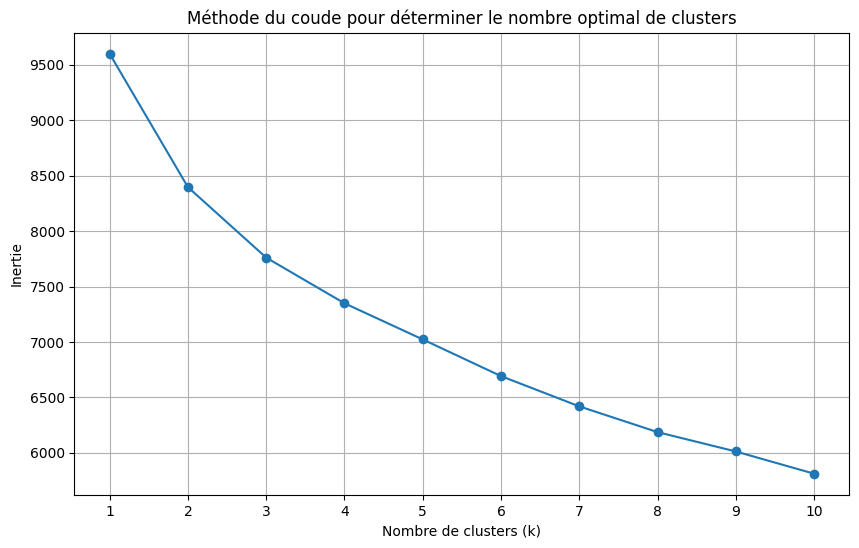

In [98]:
# Calculer l'inertie pour différents k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

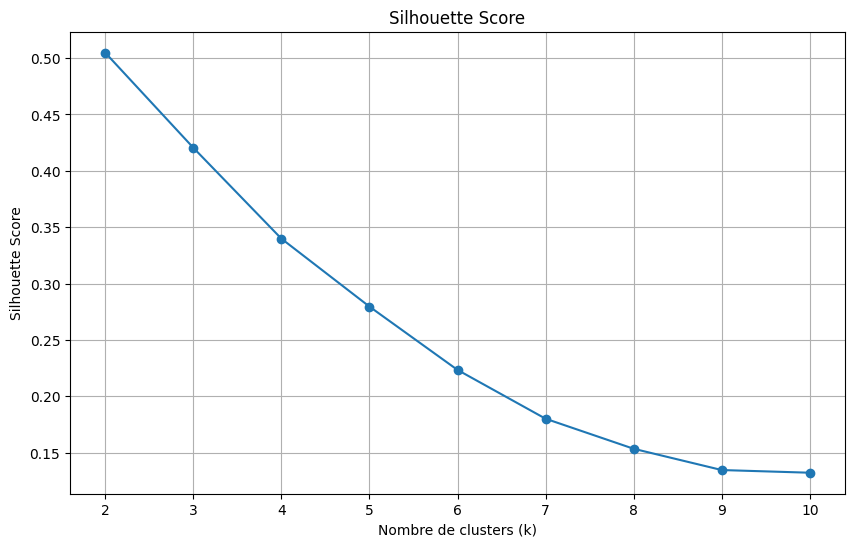

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 11))
plt.grid()
plt.show()


C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

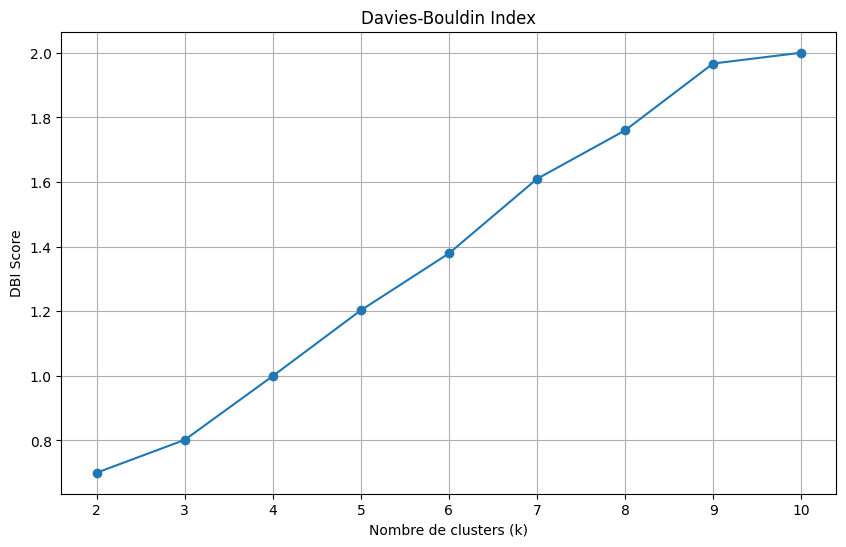

In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    dbi_scores.append(davies_bouldin_score(X, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), dbi_scores, marker='o')
plt.title("Davies-Bouldin Index")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("DBI Score")
plt.xticks(range(2, 11))
plt.grid()
plt.show()


C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

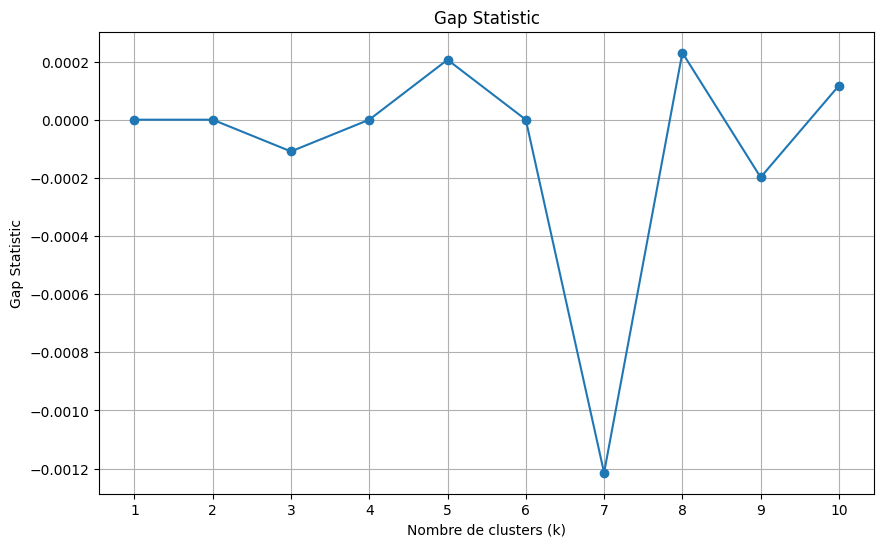

Nombre optimal de clusters (Gap Statistic) : 8


C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

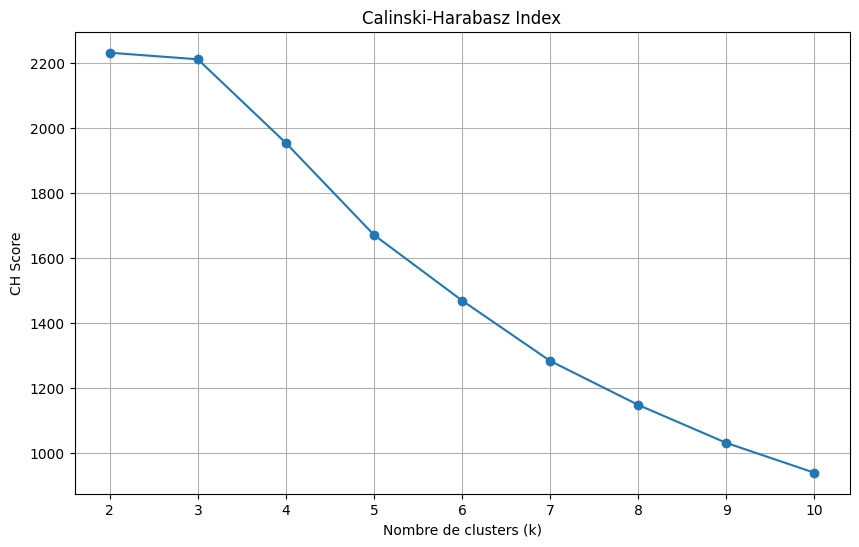

In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_scores.append(calinski_harabasz_score(X, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title("Calinski-Harabasz Index")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("CH Score")
plt.xticks(range(2, 11))
plt.grid()
plt.show()


C:\Users\Gregory\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


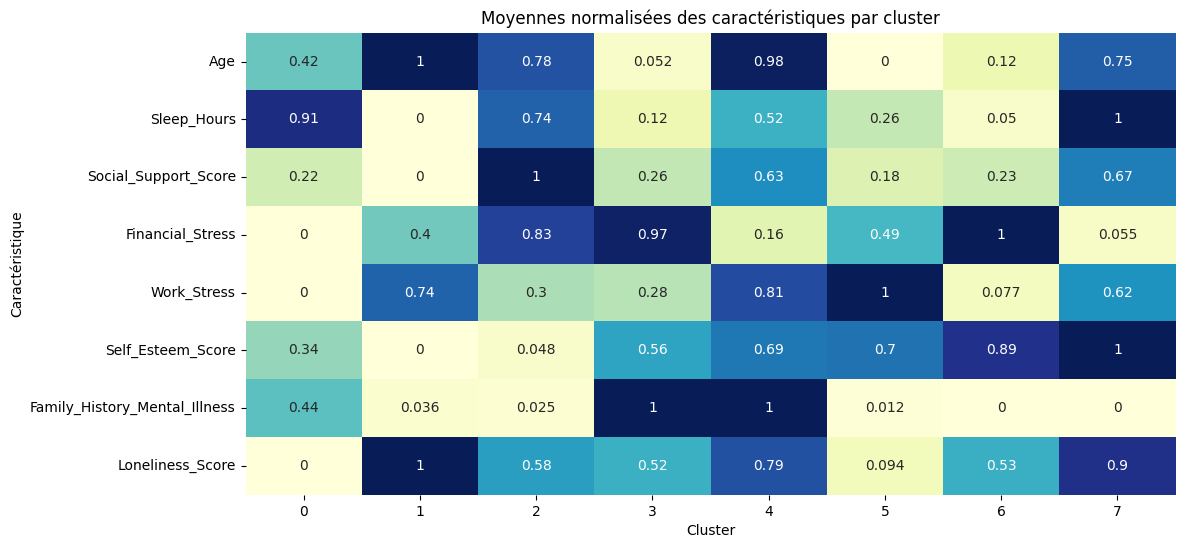

In [102]:
# Appliquer K-Means avec k=3
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
df['Cluster'] = clusters

# Calculer la moyenne des caractéristiques par cluster
cluster_means = df.groupby('Cluster')[cols].mean()

# Normaliser les moyennes pour la heatmap
cluster_means_scaled = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Tracer la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_scaled.T, annot=True, cmap='YlGnBu', cbar=False)
plt.title("Moyennes normalisées des caractéristiques par cluster")
plt.xlabel("Cluster")
plt.ylabel("Caractéristique")
plt.show()


In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Données extraites de la heatmap (remplace ces valeurs par celles de ton image)
data = {
    'Cluster 0': [0.42, 0.91, 0.22, 0.0, 0.0, 0.34, 0.44, 0.0],
    'Cluster 1': [1.0, 0.0, 0.0, 0.4, 0.74, 0.0, 0.036, 1.0],
    'Cluster 2': [0.78, 0.74, 1.0, 0.83, 0.3, 0.048, 0.025, 0.58],
    'Cluster 3': [0.052, 0.12, 0.26, 0.97, 0.28, 0.56, 1.0, 0.52],
    'Cluster 4': [0.98, 0.52, 0.63, 0.16, 0.81, 0.69, 1.0, 0.79],
    'Cluster 5': [0.0, 0.26, 0.18, 0.49, 1.0, 0.7, 0.012, 0.094],
    'Cluster 6': [0.12, 0.05, 0.23, 1.0, 0.077, 0.89, 0.0, 0.53],
    'Cluster 7': [0.75, 1.0, 0.67, 0.055, 0.62, 1.0, 0.0, 0.9]
}

# Noms des caractéristiques
categories = ['Age', 'Sleep_Hours', 'Social_Support_Score', 'Financial_Stress',
              'Work_Stress', 'Self_Esteem_Score', 'Family_History_Mental_Illness', 'Loneliness_Score']

# Convertir les données en tableau numpy
labels = list(data.keys())
data = np.array([data[key] for key in labels])


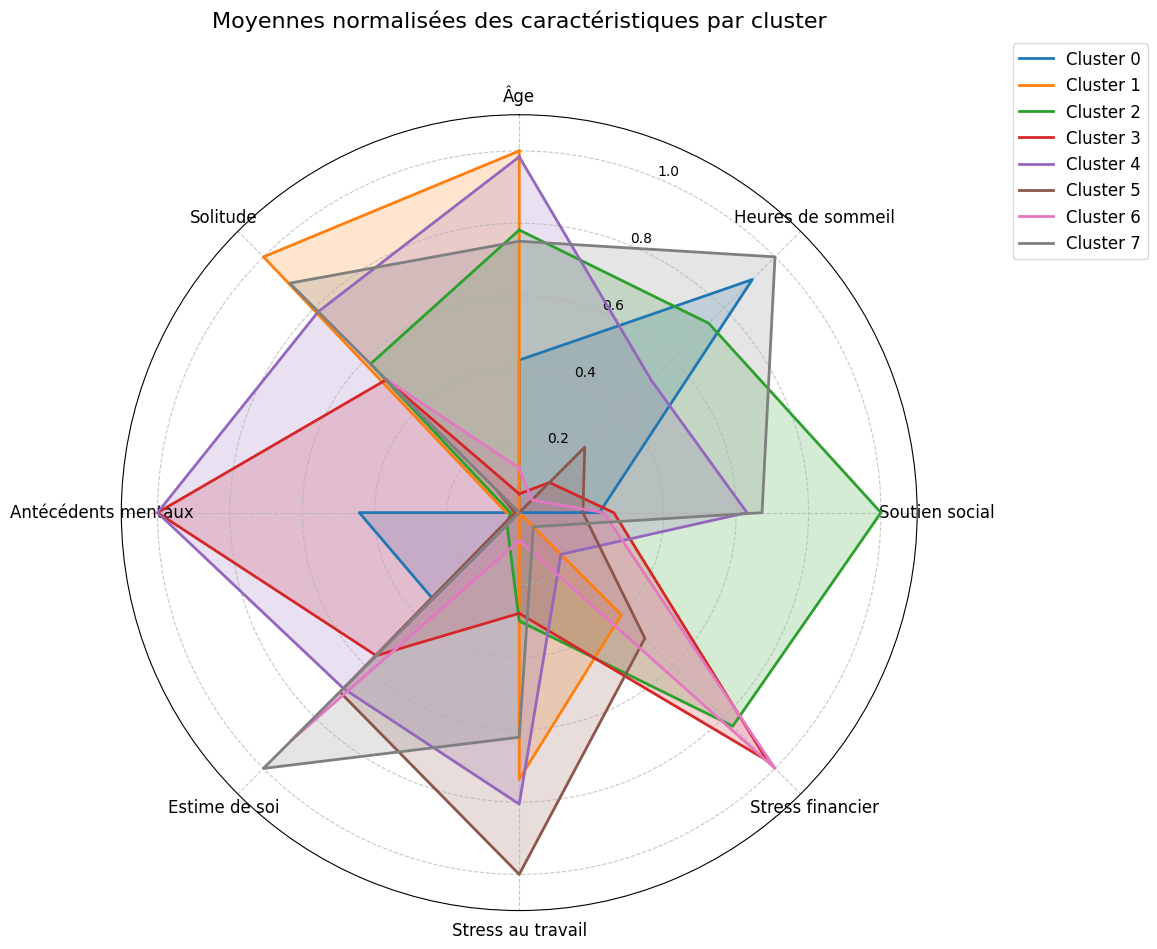

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Liste des colonnes à inclure dans le radar chart (comme dans la heatmap)
columns_for_radar = [
    'Age', 'Sleep_Hours', 'Social_Support_Score', 'Financial_Stress',
    'Work_Stress', 'Self_Esteem_Score', 'Family_History_Mental_Illness', 'Loneliness_Score'
]

# 2. Calculer les moyennes BRUTES par cluster pour ces colonnes
means_by_cluster = df.groupby('Cluster')[columns_for_radar].mean()

# 3. Normaliser UNIQUEMENT les moyennes par cluster avec MinMaxScaler (échelle [0, 1])
scaler = MinMaxScaler()
means_scaled = scaler.fit_transform(means_by_cluster)

# 4. Préparer les données pour le radar chart
categories = [
    'Âge', 'Heures de sommeil', 'Soutien social', 'Stress financier',
    'Stress au travail', 'Estime de soi', 'Antécédents mentaux', 'Solitude'
]
data = means_scaled  # Moyennes normalisées
labels = [f'Cluster {cluster}' for cluster in sorted(df['Cluster'].unique())]

# 5. Fonction pour créer le radar chart
def create_radar_chart(data, categories, labels, colors):
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fermer le cercle

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)  # Départ à 90° (axe vertical)
    ax.set_theta_direction(-1)  # Sens anti-horaire
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=12)

    # Limites radiales fixes [0, 1]
    ax.set_rlim(0, 1.1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Ajouter des ticks pour plus de lisibilité

    # Tracer chaque cluster avec une couleur différente
    for i, values in enumerate(data):
        values = np.concatenate((values, [values[0]]))  # Fermer le polygone
        ax.plot(angles, values, linewidth=2, color=colors[i], label=labels[i])
        ax.fill(angles, values, color=colors[i], alpha=0.2)

    # Ajouter des grilles et un titre
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.title('Moyennes normalisées des caractéristiques par cluster', size=16, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

    plt.tight_layout()
    plt.show()

# 6. Palette de couleurs pour les clusters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# 7. Appeler la fonction
create_radar_chart(data, categories, labels, colors)


In [ ]:
df


,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,...,Gender_Non-Binary,Gender_Other,Education_Level_High School,Education_Level_Master's,Education_Level_Other,Education_Level_PhD,Employment_Status_Retired,Employment_Status_Student,Employment_Status_Unemployed,Cluster
0,56,6.0,0.4,3,4,2,9,0,0,Regular,...,False,False,False,False,False,False,False,False,True,0
1,69,8.8,2.8,6,18,7,6,0,0,Regular,...,False,False,False,False,False,False,True,False,False,7
2,46,5.3,1.6,5,5,13,8,0,0,Regular,...,False,False,False,True,False,False,False,False,False,5
3,32,8.8,0.5,4,6,3,4,1,1,Regular,...,False,False,True,False,False,False,False,False,True,3
4,60,7.2,0.7,2,7,15,3,0,0,Regular,...,False,False,False,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,5.1,0.1,7,16,15,5,1,0,Occasional,...,False,False,False,False,True,False,False,True,False,4
1196,43,8.9,0.4,9,19,4,9,0,0,Regular,...,False,False,False,True,False,False,False,False,False,5
1197,71,6.0,0.1,2,15,4,2,0,0,Regular,...,False,False,False,False,False,True,True,False,False,7
1198,21,8.5,2.7,8,12,20,2,1,1,Regular,...,False,False,False,False,True,False,False,False,False,3


In [ ]:
# Calculer la moyenne, l'écart-type, le min et le max de l'âge pour chaque cluster
age_stats_by_cluster = df.groupby('Cluster')['Age'].agg(['mean', 'std', 'min', 'max'])

# Afficher le résultat
print(age_stats_by_cluster)



              mean        std  min  max
Cluster                                
0        45.260870  16.692716   18   74
1        52.228571  15.944302   19   74
2        49.595092  14.747939   18   74
3        40.805031  16.153723   18   74
4        52.033113  15.693913   18   74
5        40.180723  15.788868   18   74
6        41.661654  15.241434   19   74
7        49.220000  16.141518   18   74


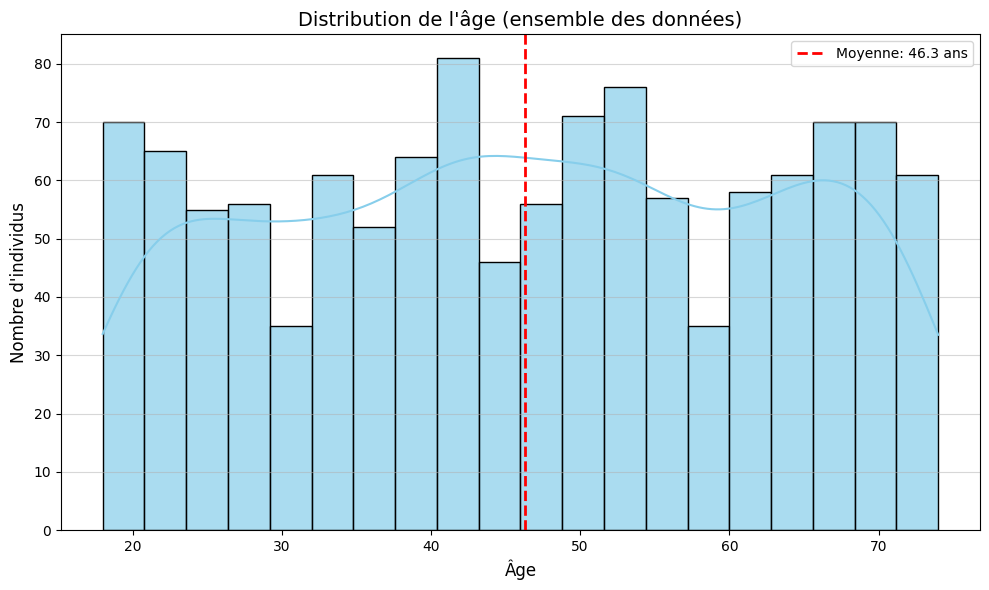

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer l'histogramme
sns.histplot(
    data=df,
    x='Age',
    bins=20,  # Nombre de barres (ajuste selon ta distribution)
    kde=True,  # Ajouter une courbe de densité (optionnel)
    color='skyblue',  # Couleur des barres
    edgecolor='black',  # Contour des barres
    alpha=0.7  # Transparence
)

# Ajouter un titre et des labels
plt.title("Distribution de l'âge (ensemble des données)", fontsize=14)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre d'individus", fontsize=12)

# Ajouter une ligne verticale pour la moyenne (optionnel)
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f"Moyenne: {df['Age'].mean():.1f} ans")
plt.legend()

# Afficher le graphique
plt.grid(axis='y', alpha=0.5)  # Grille légère pour l'axe y
plt.tight_layout()
plt.show()



In [ ]:
#faire un radar chart avec le niveau de stress d'anxiété et de depression dans chaque clusters

In [ ]:
df

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,...,Gender_Non-Binary,Gender_Other,Education_Level_High School,Education_Level_Master's,Education_Level_Other,Education_Level_PhD,Employment_Status_Retired,Employment_Status_Student,Employment_Status_Unemployed,Cluster
0,56,6.0,0.4,3,-1.095000,-1.540556,1.576198,0,0,Regular,...,False,False,False,False,False,False,False,False,True,0
1,69,8.8,2.8,6,1.274398,-0.652542,0.393803,0,0,Regular,...,False,False,False,False,False,False,True,False,False,7
2,46,5.3,1.6,5,-0.925758,0.413075,1.182067,0,0,Regular,...,False,False,False,True,False,False,False,False,False,5
3,32,8.8,0.5,4,-0.756515,-1.362954,-0.394460,1,1,Regular,...,False,False,True,False,False,False,False,False,True,3
4,60,7.2,0.7,2,-0.587272,0.768280,-0.788592,0,0,Regular,...,False,False,False,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,5.1,0.1,7,0.935912,0.768280,-0.000328,1,0,Occasional,...,False,False,False,False,True,False,False,True,False,4
1196,43,8.9,0.4,9,1.443640,-1.185351,1.576198,0,0,Regular,...,False,False,False,True,False,False,False,False,False,5
1197,71,6.0,0.1,2,0.766669,-1.185351,-1.182724,0,0,Regular,...,False,False,False,False,False,True,True,False,False,7
1198,21,8.5,2.7,8,0.258941,1.656294,-1.182724,1,1,Regular,...,False,False,False,False,True,False,False,False,False,3


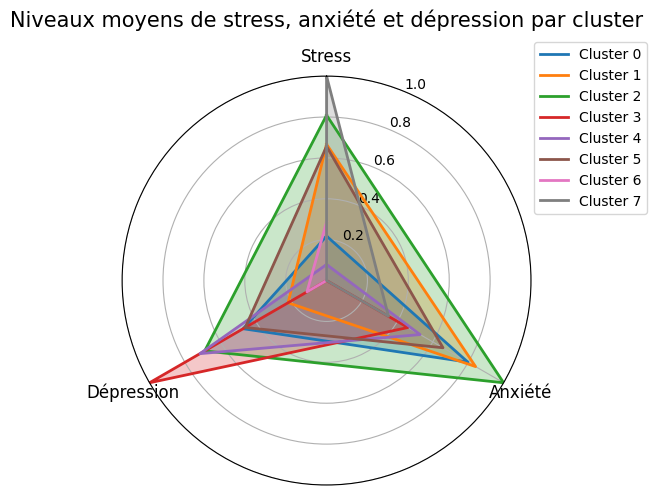

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # On utilise MinMaxScaler pour une échelle [0, 1]

# 1. Calculer les moyennes BRUTES par cluster (sans normalisation préalable)
means_by_cluster = df.groupby('Cluster')[['Stress_Level', 'Anxiety_Score', 'Depression_Score']].mean()

# 2. Normaliser UNIQUEMENT les moyennes par cluster avec MinMaxScaler (pour une échelle [0, 1])
scaler = MinMaxScaler()
means_scaled = scaler.fit_transform(means_by_cluster)

# 3. Extraire les valeurs pour le radar chart
categories = ['Stress', 'Anxiété', 'Dépression']
data = means_scaled  # Utiliser les moyennes normalisées
labels = [f'Cluster {cluster}' for cluster in sorted(df['Cluster'].unique())]

# 4. Fonction pour créer le radar chart
def create_radar_chart(data, categories, labels):
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fermer le cercle

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=12)

    # Définir les limites de l'axe radial (de 0 à 1)
    ax.set_rlim(0, 1)

    # Tracer les données pour chaque cluster
    for i, values in enumerate(data):
        values = np.concatenate((values, [values[0]]))  # Fermer le polygone
        ax.plot(angles, values, linewidth=2, label=labels[i])
        ax.fill(angles, values, alpha=0.25)

    # Ajouter un titre
    plt.title('Niveaux moyens de stress, anxiété et dépression par cluster', size=15, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Appeler la fonction
create_radar_chart(data, categories, labels)



In [ ]:
#on pourrait mettre en rapport les radar charts variables indépendantes et dépendantes. Nous pourrions orienter le questionnaire sur des sujets concernant les variables indépendentes de sorte à définir dans quel cluster appartient l'individu. 
# De cette façon, nous pourrions estimer le niveau potentiel des trois variables dépendantes.
#Selon le score inféré de santé mentale, des stratégies de préventions pourrait être attribués pour chacun des clusters.
#Par exemple le Cluster 3 pourrait faire l'objest d'un dépistage plus spécifique de la dépression.. Le 2 pourrait lui, se voir proposer des stratégie de réduction de l'anxiété

In [108]:
# Reconstruire Employment_Status
df['Employment_Status'] = None
df.loc[df['Employment_Status_Retired'], 'Employment_Status'] = 'Retired'
df.loc[df['Employment_Status_Student'], 'Employment_Status'] = 'Student'
df.loc[df['Employment_Status_Unemployed'], 'Employment_Status'] = 'Unemployed'
df['Employment_Status'] = df['Employment_Status'].fillna('Employed')

# Reconstruire Education_Level
df['Education_Level'] = None
df.loc[df['Education_Level_High School'], 'Education_Level'] = 'High School'
df.loc[df['Education_Level_Master\'s'], 'Education_Level'] = 'Master\'s'
df.loc[df['Education_Level_Other'], 'Education_Level'] = 'Other'
df.loc[df['Education_Level_PhD'], 'Education_Level'] = 'PhD'
df['Education_Level'] = df['Education_Level'].fillna('Bachelor\'s')

# Calculer les proportions de Employment_Status par cluster
employment_proportions = pd.crosstab(
    index=df['Cluster'],
    columns=df['Employment_Status'],
    normalize='index'
).round(3) * 100  # Convertir en pourcentage

# Calculer les proportions de Education_Level par cluster
education_proportions = pd.crosstab(
    index=df['Cluster'],
    columns=df['Education_Level'],
    normalize='index'
).round(3) * 100  # Convertir en pourcentage

# Afficher les résultats
print("Proportions de Employment_Status par cluster (%):")
display(employment_proportions)

print("\nProportions de Education_Level par cluster (%):")
display(education_proportions)


Proportions de Employment_Status par cluster (%):


Employment_Status,Employed,Retired,Student,Unemployed
Cluster,,,,
0,29.7,28.3,24.6,17.4
1,27.9,23.6,22.9,25.7
2,23.9,27.6,27.6,20.9
3,24.5,20.1,33.3,22.0
4,19.2,25.2,22.5,33.1
5,27.7,21.1,23.5,27.7
6,29.3,20.3,26.3,24.1
7,32.0,22.0,25.3,20.7



Proportions de Education_Level par cluster (%):


Education_Level,Bachelor's,High School,Master's,Other,PhD
Cluster,,,,,
0,19.6,22.5,16.7,13.8,27.5
1,20.7,14.3,22.1,22.1,20.7
2,13.5,19.6,20.9,23.3,22.7
3,15.7,27.0,23.3,17.0,17.0
4,14.6,21.2,21.2,18.5,24.5
5,17.5,23.5,16.9,24.7,17.5
6,19.5,16.5,15.0,22.6,26.3
7,22.7,15.3,24.7,17.3,20.0


In [ ]:
# Pistes à investiguer : 
# refaire le clustering avec 2 groupes pluto que 8
# refaire le clustering en séparant les hommes et les femmes (2 df séparés) soit 4 radars charts. En s'appuyant sur l'hypothèse,  à priori forte de différences de genres dans la santé mentale.
#Ouverture de piste : Regarder les variables qui viennent à posteriori (radar charts additionnels) en tenant compte de la médication, du suivi thérapeutique, médiation, etc...